In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import datetime as d
import os
import pytz
import gsw

In [2]:
# Salinity values from CTD profiles
interpDepths = np.array((0,70,120))
interpValues = np.array((35.05, 35.3, 35.3))
shipsLon = -159
shipsLat = 22

WHOIStringPickle = '/Users/edwardlrichards/cir_processing/Enviornment/processedData/WHOI_Temp_String.pic'
WHOIString = pd.read_pickle(WHOIStringPickle)

ss_dataPickle = '/Users/edwardlrichards/cir_processing/Enviornment/processedData/soundSpeedProfile.pic'
ssData = pd.read_pickle(ss_dataPickle)

Temp_dataPickle = '/Users/edwardlrichards/cir_processing/Enviornment/processedData/tempProfile.pic'
tempData = pd.read_pickle(Temp_dataPickle)

val1_temp2 = pd.read_pickle('/Users/edwardlrichards/cir_processing/Enviornment/processedData/VLA_1_deploy_2Temp.pic')
val2_temp2 = pd.read_pickle('/Users/edwardlrichards/cir_processing/Enviornment/processedData/VLA_2_deploy_2Temp.pic')

sensorDepths = WHOIString.columns
psu = np.interp(sensorDepths, interpDepths, interpValues)
SA = gsw.SA_from_SP(psu, sensorDepths, shipsLon, shipsLat)
CT = gsw.CT_from_t(SA, WHOIString.values, sensorDepths)
soundSpeed = gsw.sound_speed(SA, CT, sensorDepths)
soundSpeed = pd.DataFrame(soundSpeed, index=WHOIString.index,\
                         columns=WHOIString.columns)

In [3]:
castNum = 12
plotTimeRange = d.timedelta(0,3600)
centerTime = ssData.columns[castNum-1]
WHOI_close = WHOIString.ix[(centerTime - plotTimeRange):
                          (centerTime + plotTimeRange), :]
# vla1_close = val1_temp2.ix[(centerTime - plotTimeRange):
#                 (centerTime + plotTimeRange), :]
# vla2_close = val2_temp2.ix[(centerTime - plotTimeRange):
#                 (centerTime + plotTimeRange), :]

In [26]:
for i, c in enumerate(ssData.columns):
    print('CTD cast %i:\t %s' %(i+1, c.strftime('J%j %H:%M')))

CTD cast 1:	 J187 05:27
CTD cast 2:	 J185 03:05
CTD cast 3:	 J185 02:30
CTD cast 4:	 J184 21:37
CTD cast 5:	 J184 20:45
CTD cast 6:	 J179 16:54
CTD cast 7:	 J176 19:22
CTD cast 8:	 J175 23:33
CTD cast 9:	 J175 19:48
CTD cast 10:	 J192 06:42
CTD cast 11:	 J187 07:23
CTD cast 12:	 J187 06:30


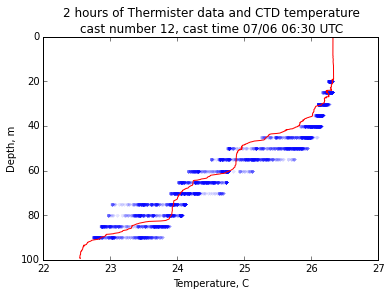

In [5]:
_ = plt.plot(WHOI_close.T, WHOI_close.columns, 'b.', alpha=0.1)
# _ = plt.plot(vla1_close.T, vla1_close.columns, 'g', alpha=0.1)
# _ = plt.plot(vla2_close.T, vla2_close.columns, 'y', alpha=0.1)

_ = plt.plot(tempData[centerTime], tempData.index, 'r')
_ = plt.ylim(100, 0)
_ = plt.xlim(22, 27)
_ = plt.title('2 hours of Thermister data and CTD temperature\n'+\
              'cast number %i, cast time %s UTC'%(castNum, centerTime.strftime('%m/%d %H:%M')))
_ = plt.xlabel('Temperature, C')
_ = plt.ylabel('Depth, m')
# _ = plt.xlim(1528, 1538)
plt.savefig('./figs/ctd_WHOI_ts')

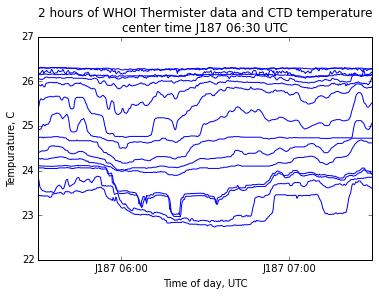

In [6]:
majorLoc = dates.HourLocator(interval=1)
majorFmt = dates.DateFormatter("J%j %H:%M")
fig, ax = plt.subplots()
_ = ax.plot(WHOI_close.index, WHOI_close, 'b')
_ = ax.xaxis.set_major_locator(majorLoc)
_ = ax.xaxis.set_major_formatter(majorFmt)
_ = plt.ylim(22,27)
_ = plt.title('2 hours of WHOI Thermister data and CTD temperature\n'+\
    'center time %s UTC'%centerTime.strftime('J%j %H:%M'))
_ = plt.ylabel('Tempurature, C')
_ = plt.xlabel('Time of day, UTC')
plt.savefig('./figs/WHOI_ts')